In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
#import imutils

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image


print('ok')

ok


In [2]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
print('ok')

ok


In [3]:
from utils import label_map_util
from utils import visualization_utils as vis_util
from vtils import viz_labels

In [4]:
# What model to download.
MODEL_NAME = 'tae'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('tae', 'my_labels.pbtxt')
NUM_CLASSES = 9

In [5]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
print('ok')

ok


In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [8]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(2, 9) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (50, 50)
print('ok')


ok


[]
[{'y_btm_left': 2580.7257207632065, 'x_btm_left': 9.983482360839844, 'y_top_right': 92.55383312702179, 'x_top_right': 1020.9834823608398, 'name': 'tv', 'x_top_left': 9.983482360839844, 'y_btm_right': 1336.7257207632065, 'h': 1011, 'y_top_left': 92.55383312702179, 'x_btm_right': 1021.9342517852783, 'w': 1244}]
[]
[{'y_btm_left': 990.5055456161499, 'x_btm_left': 47.69124090671539, 'y_top_right': 4.221320152282715, 'x_top_right': 391.6912409067154, 'name': 'chair', 'x_top_left': 47.69124090671539, 'y_btm_right': 497.5055456161499, 'h': 344, 'y_top_left': 4.221320152282715, 'x_btm_right': 392.6231265068054, 'w': 493}]
[{'y_btm_left': 412.43816459178925, 'x_btm_left': 72.06856866180897, 'y_top_right': 127.46763610839844, 'x_top_right': 164.06856866180897, 'name': 'chair', 'x_top_left': 72.06856866180897, 'y_btm_right': 270.43816459178925, 'h': 92, 'y_top_left': 127.46763610839844, 'x_btm_right': 164.65501999855042, 'w': 142}, {'y_btm_left': 414.8309347629547, 'x_btm_left': 193.2908896207

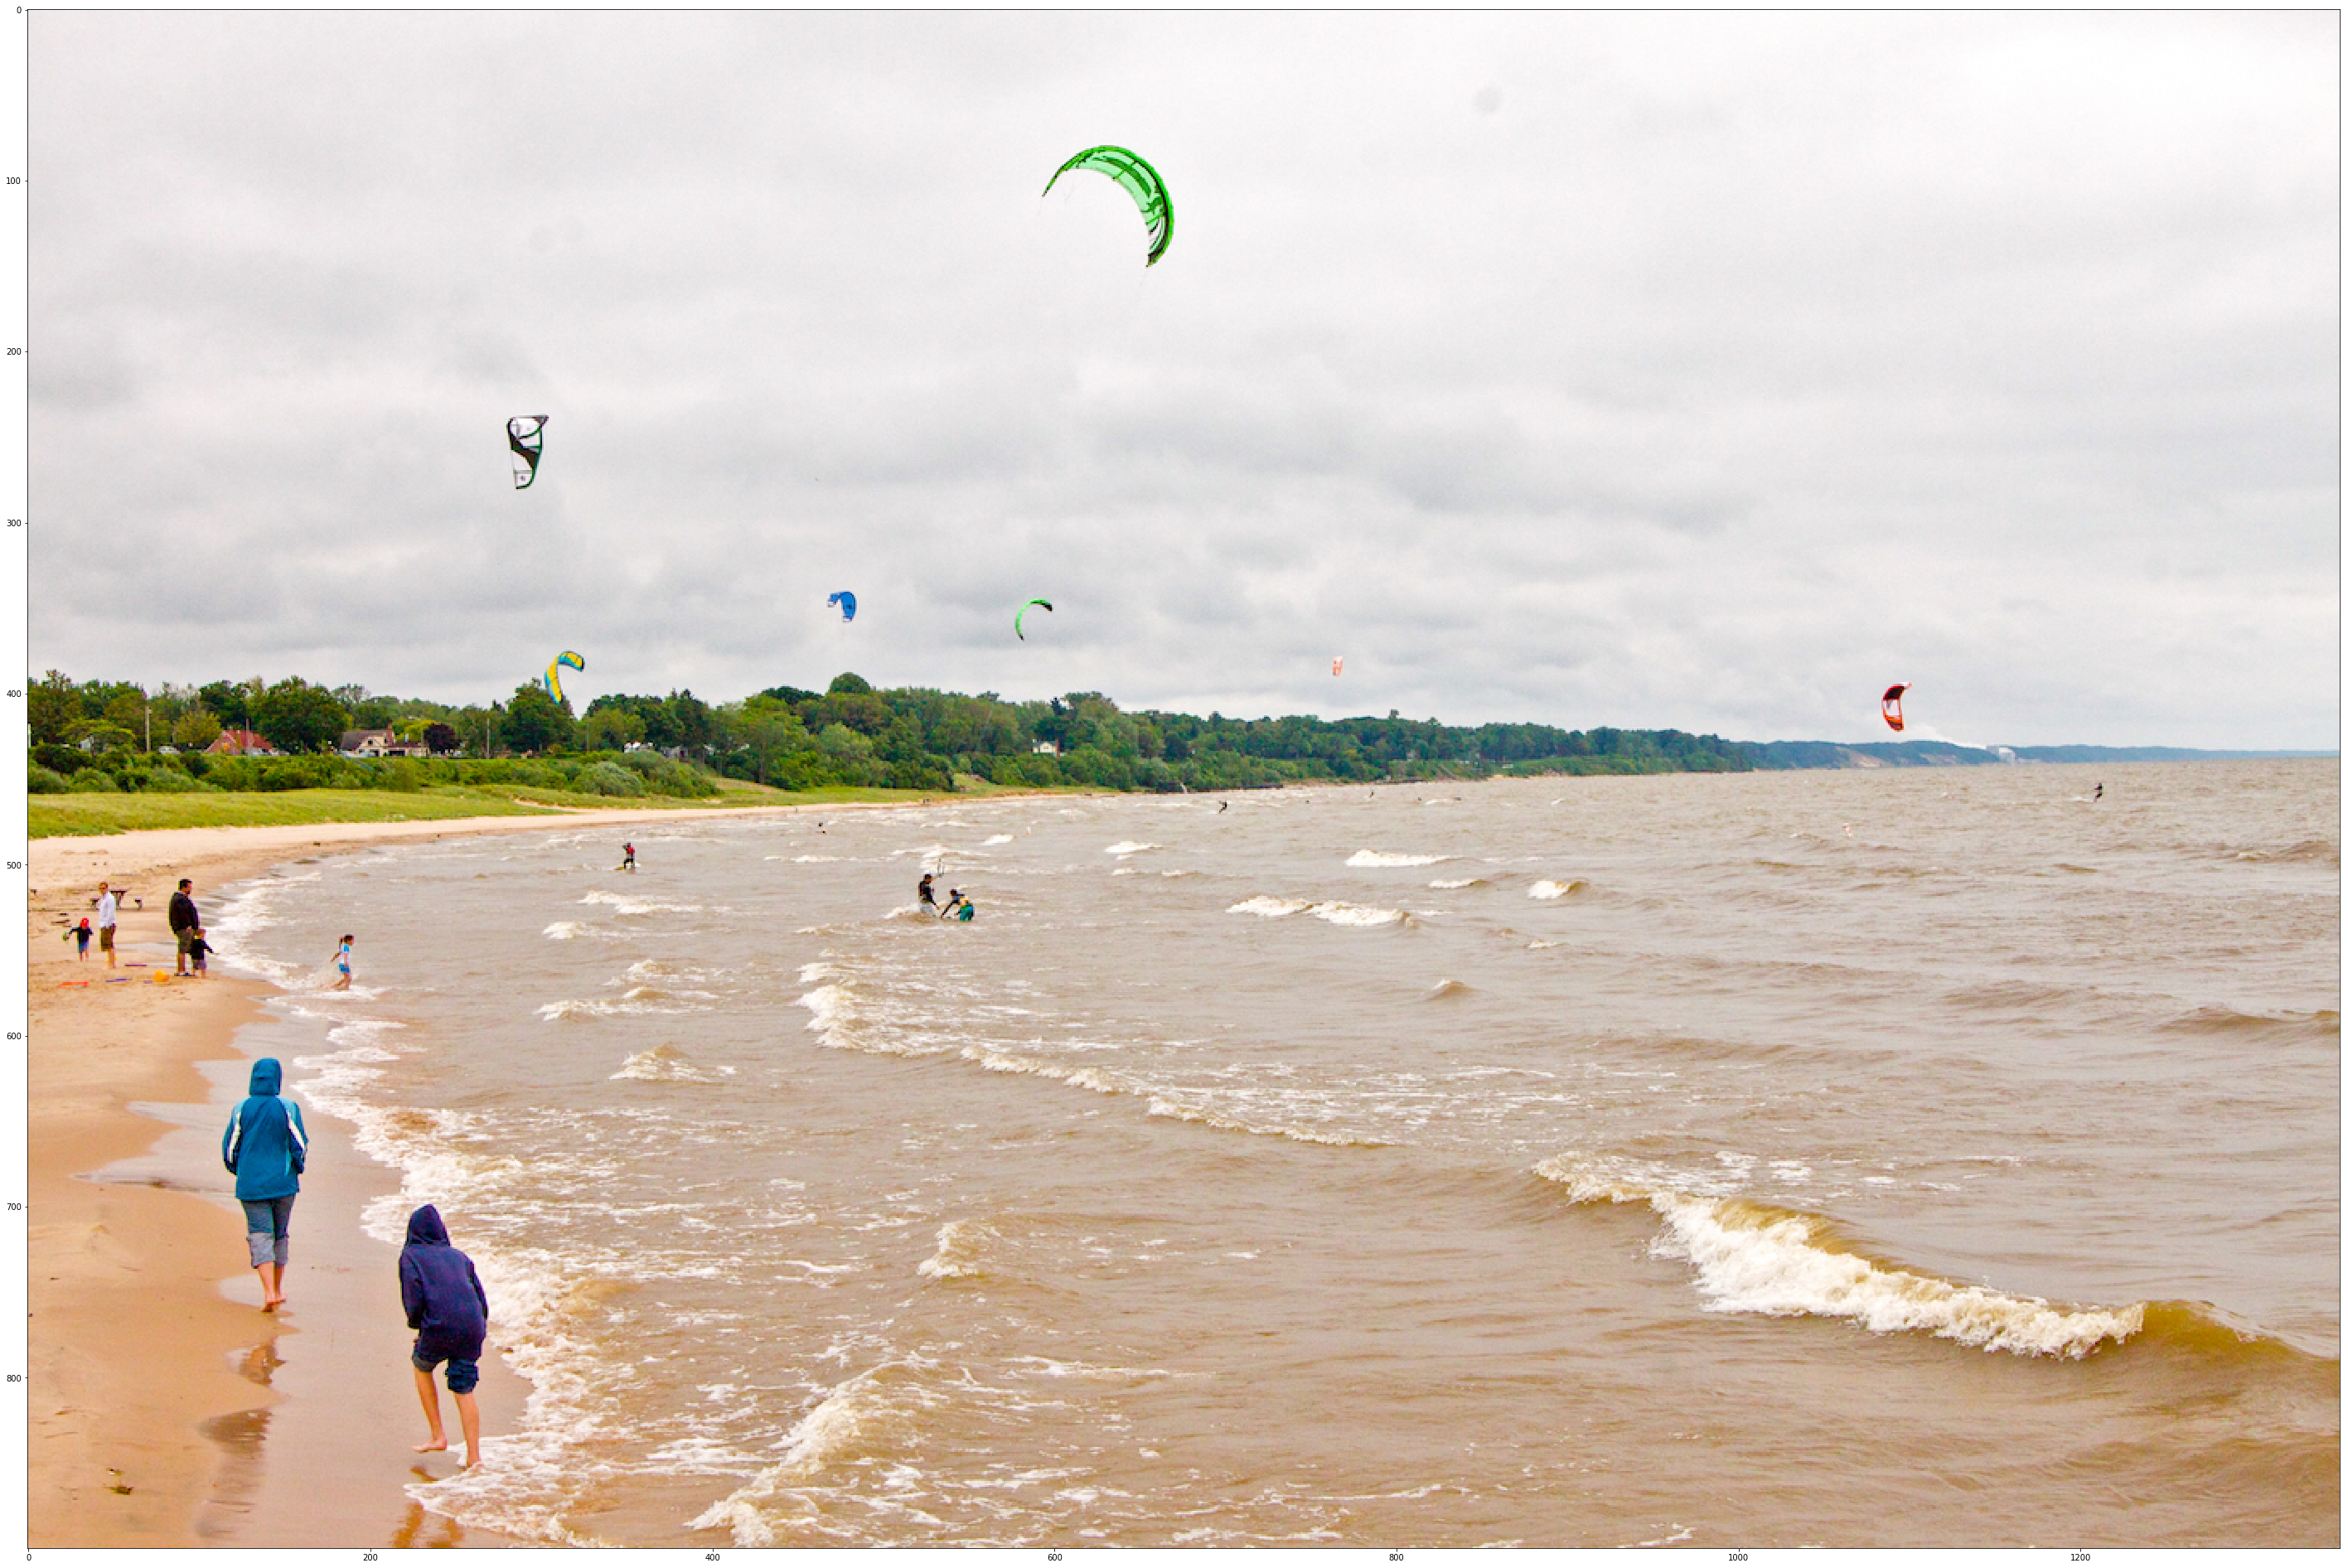

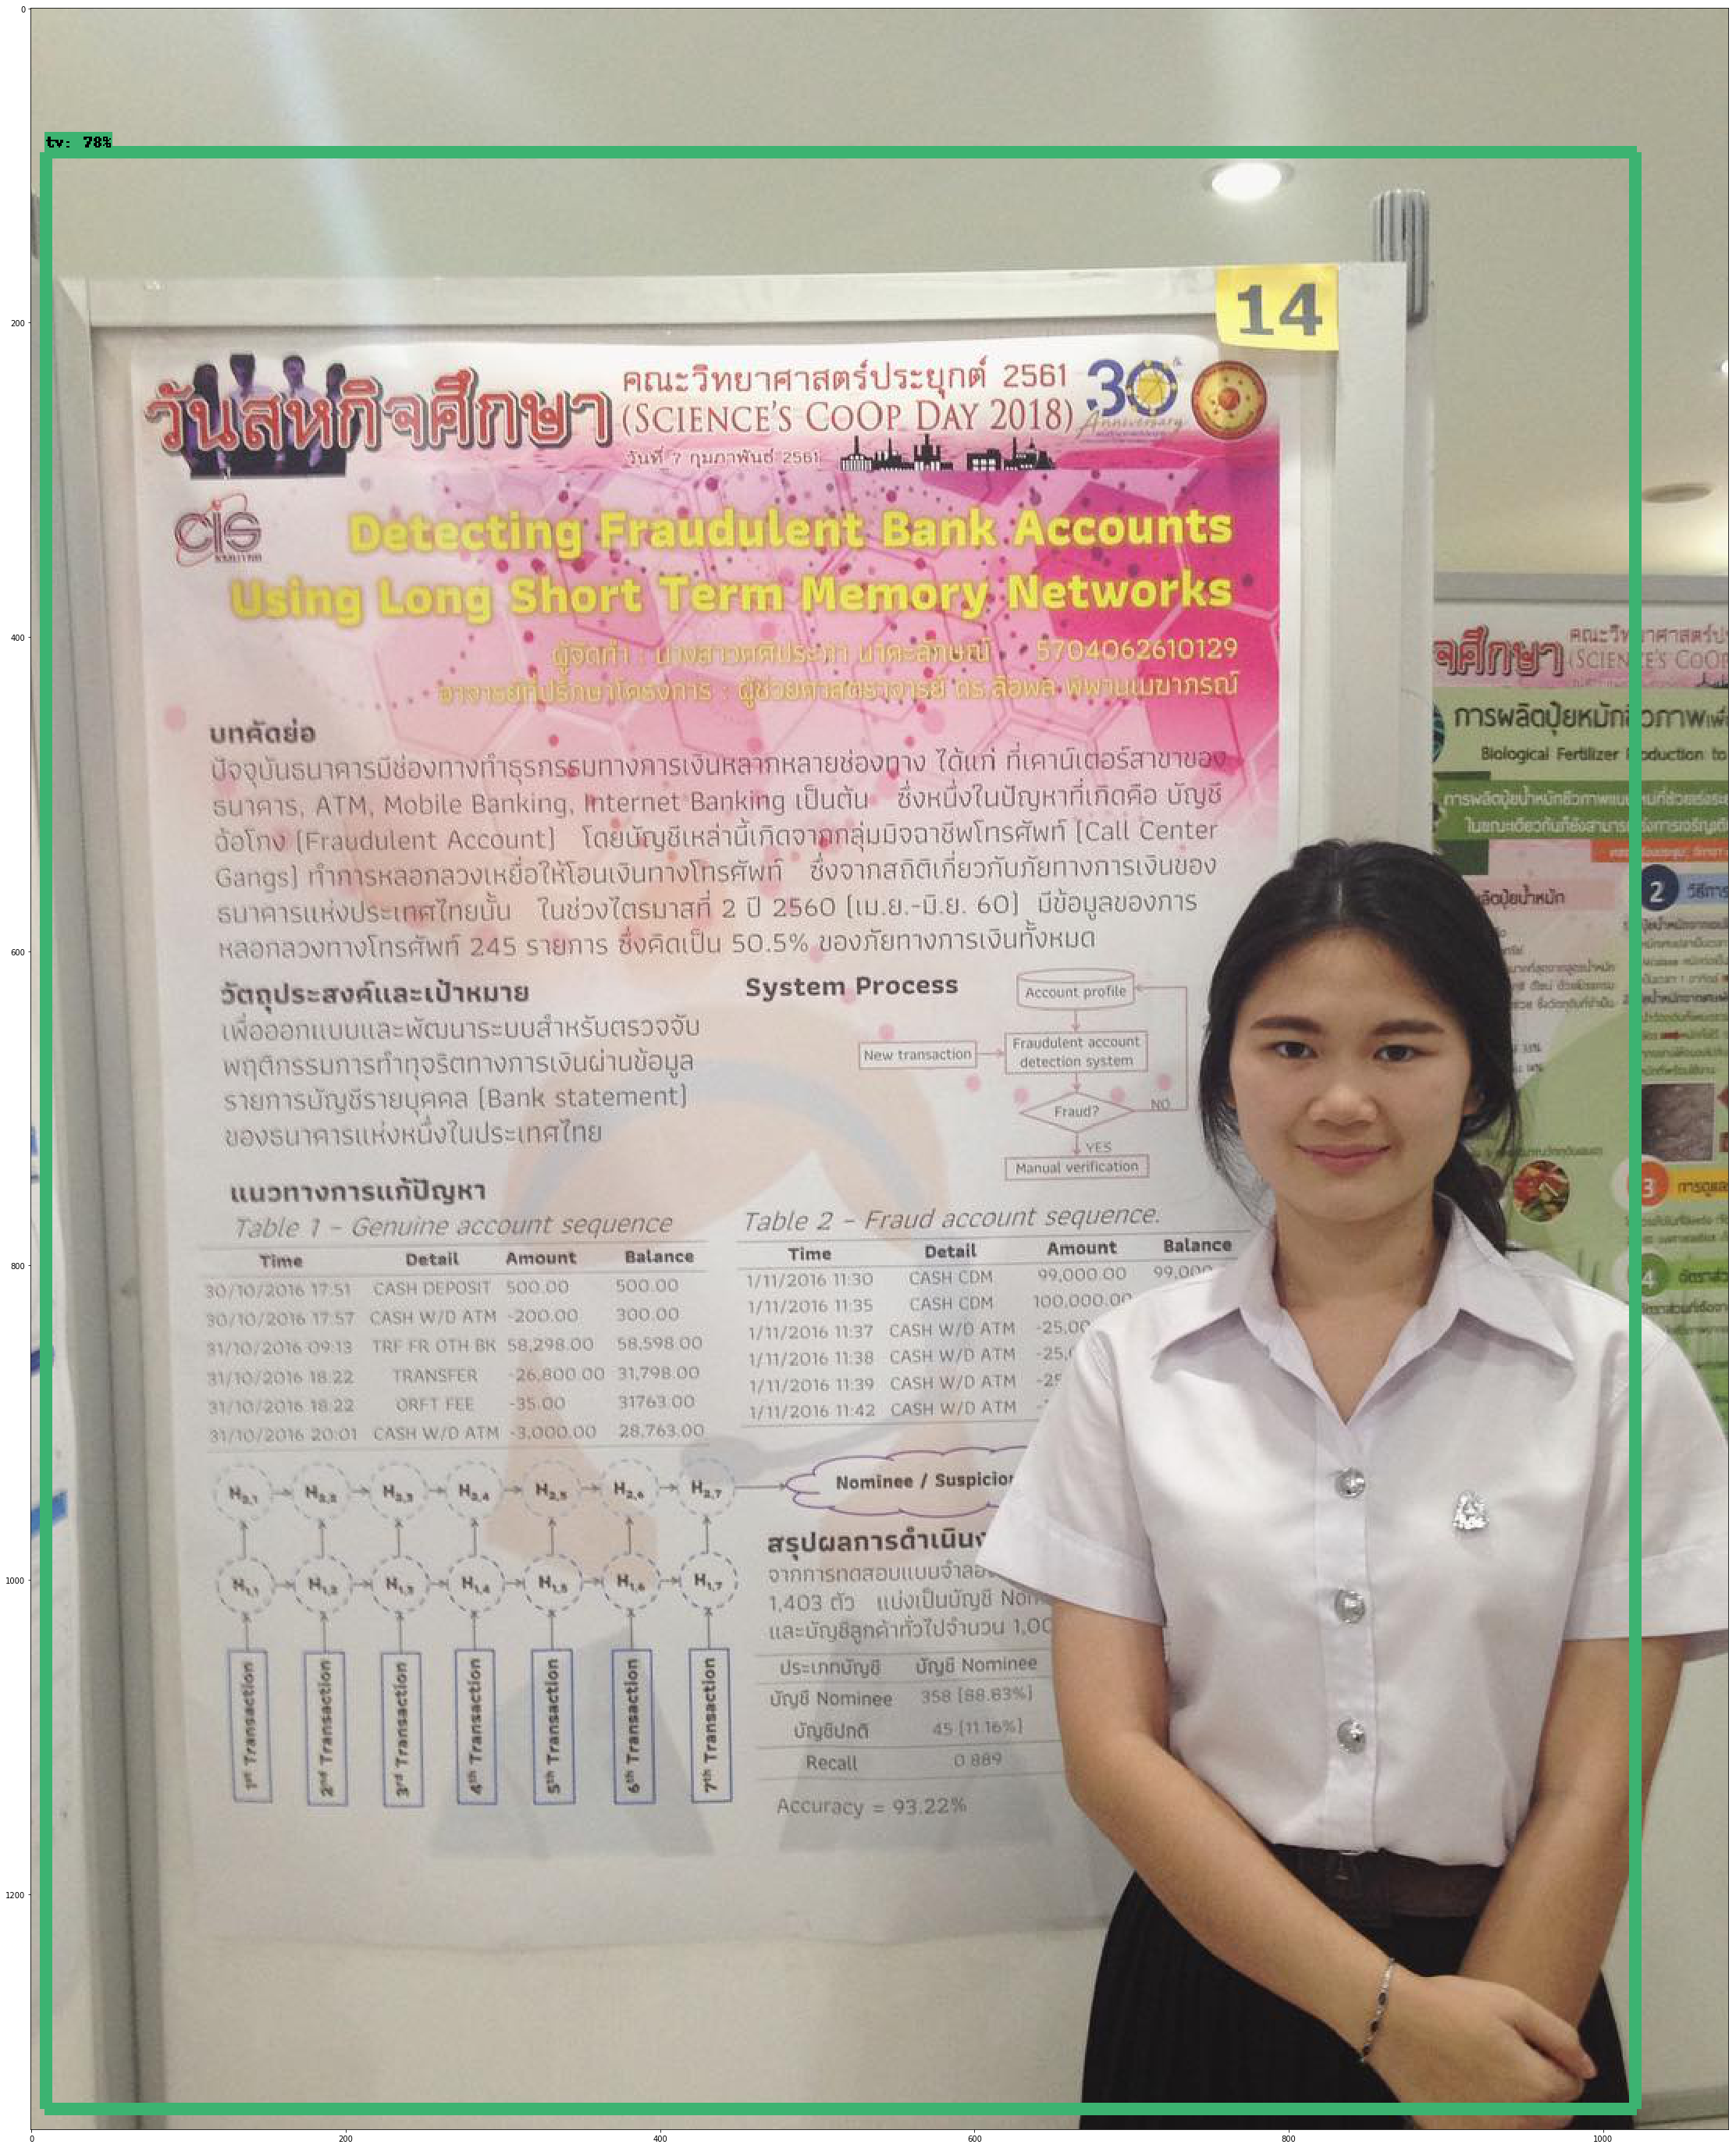

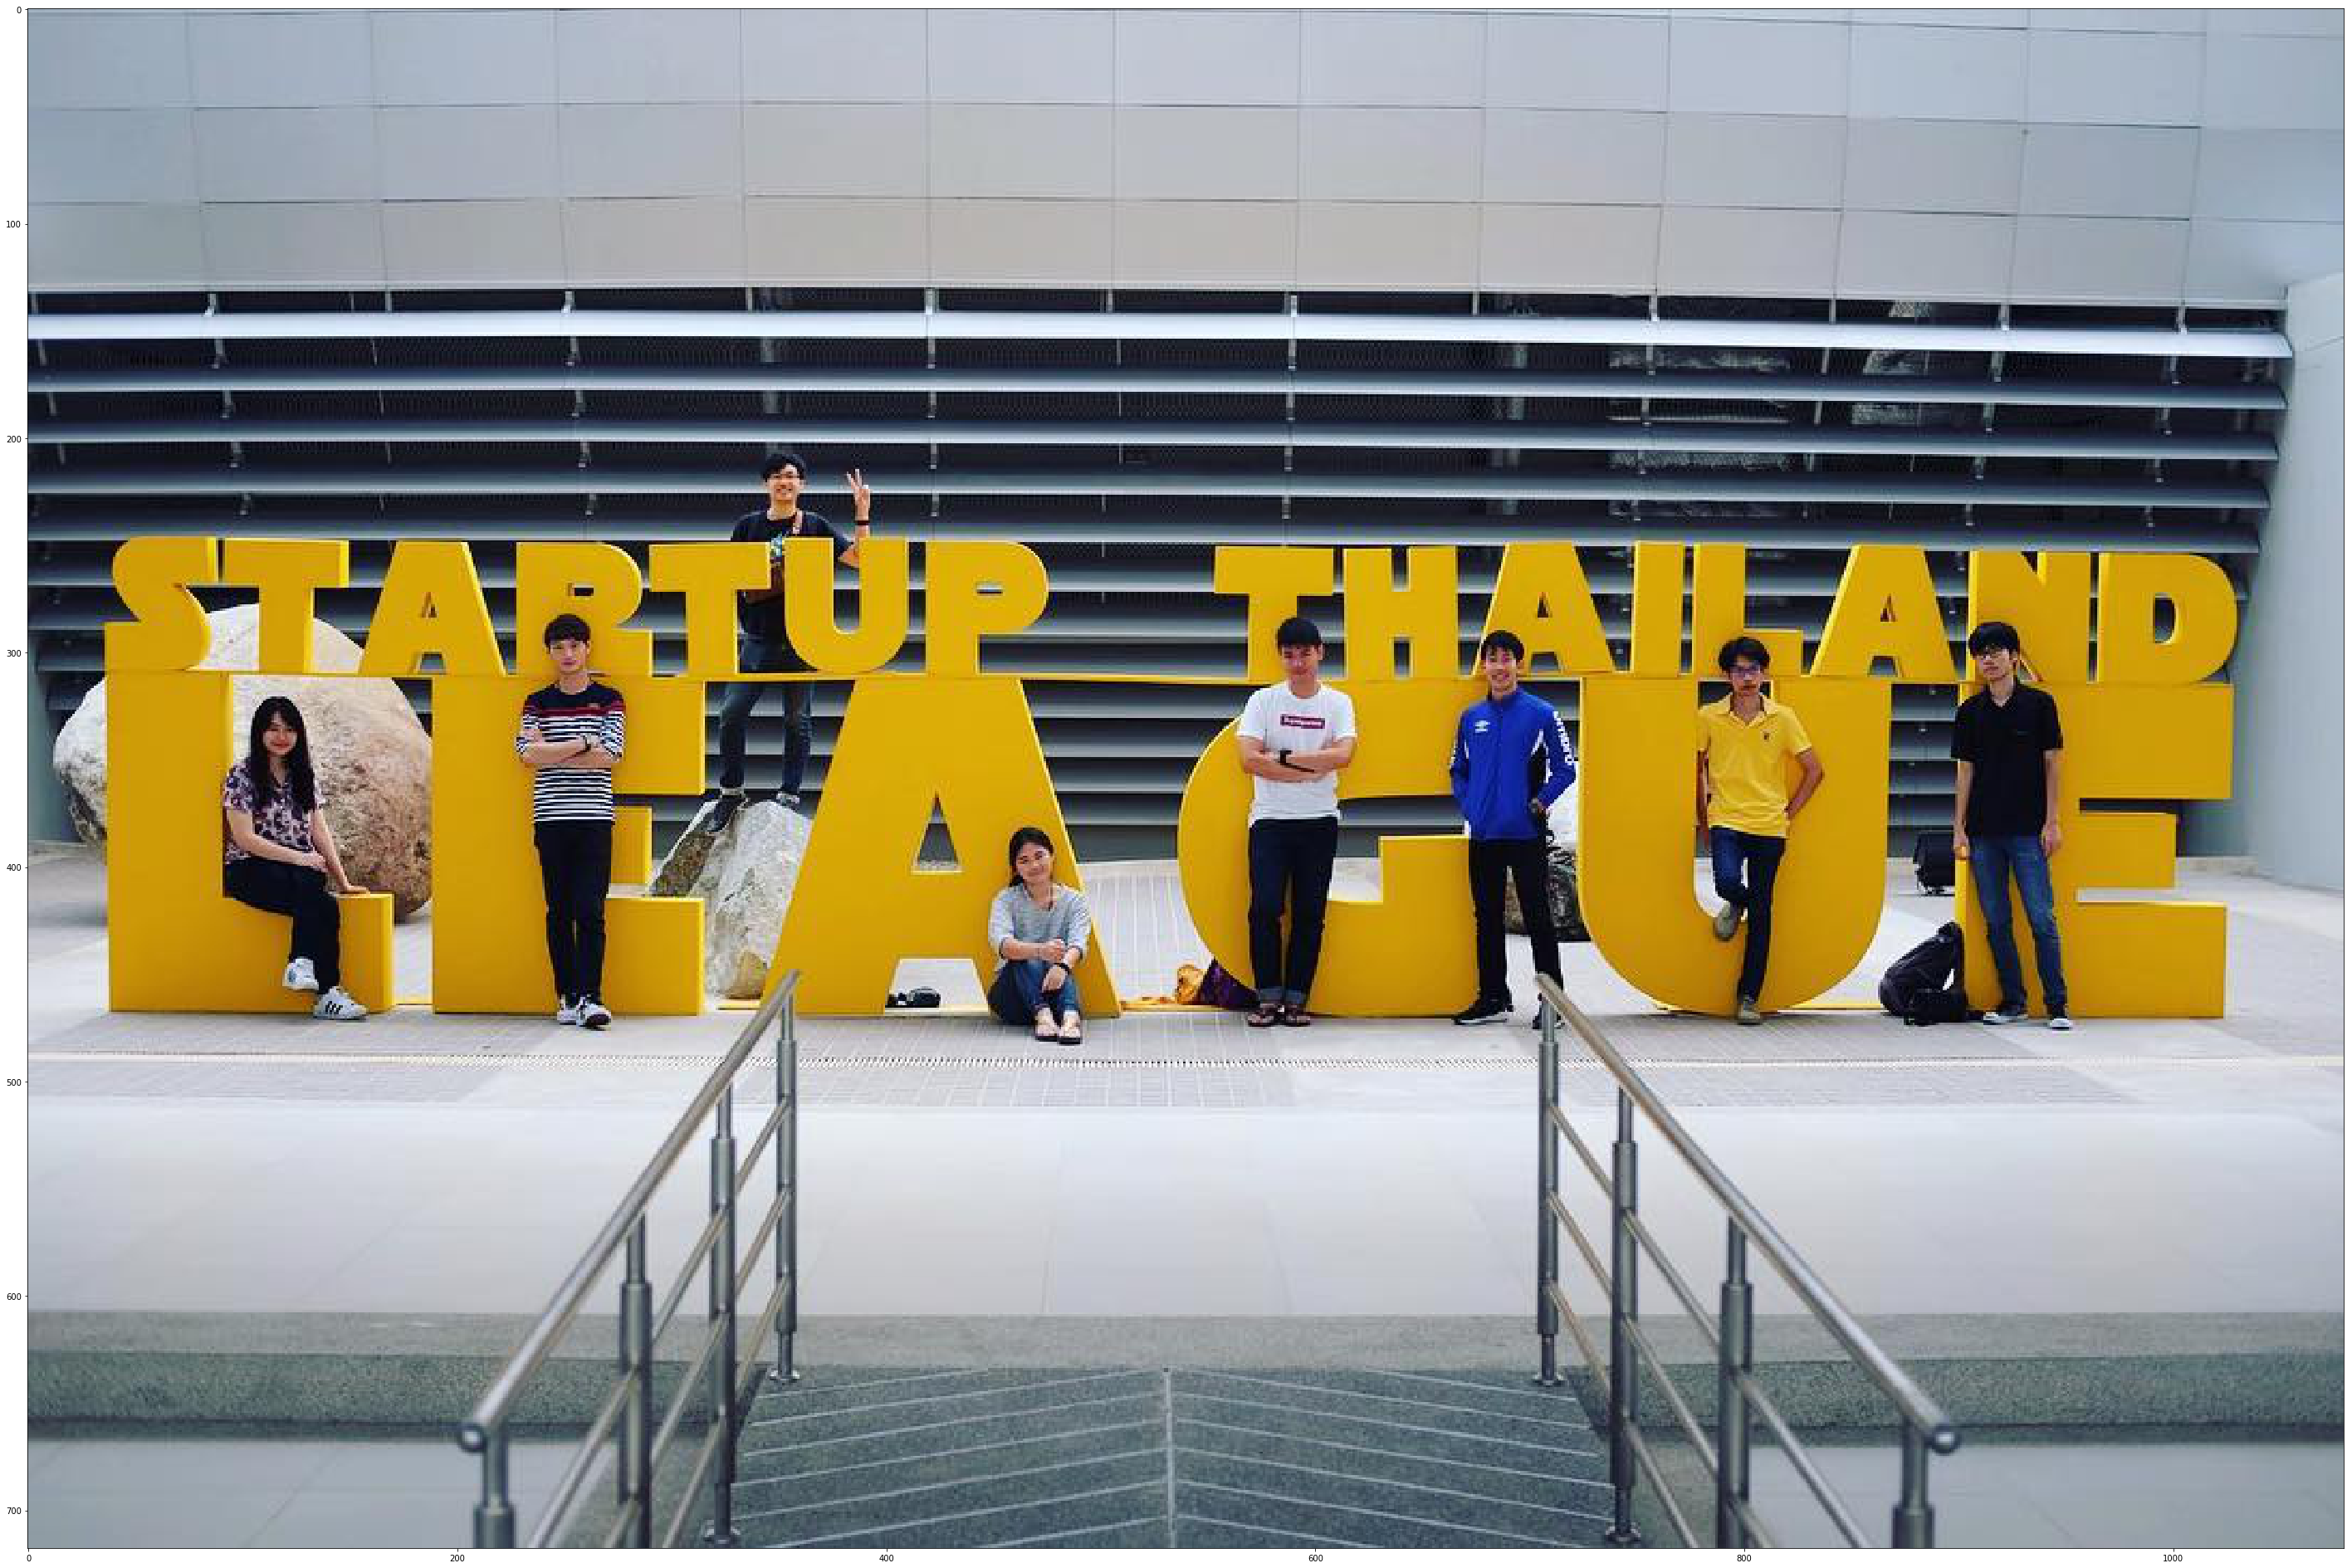

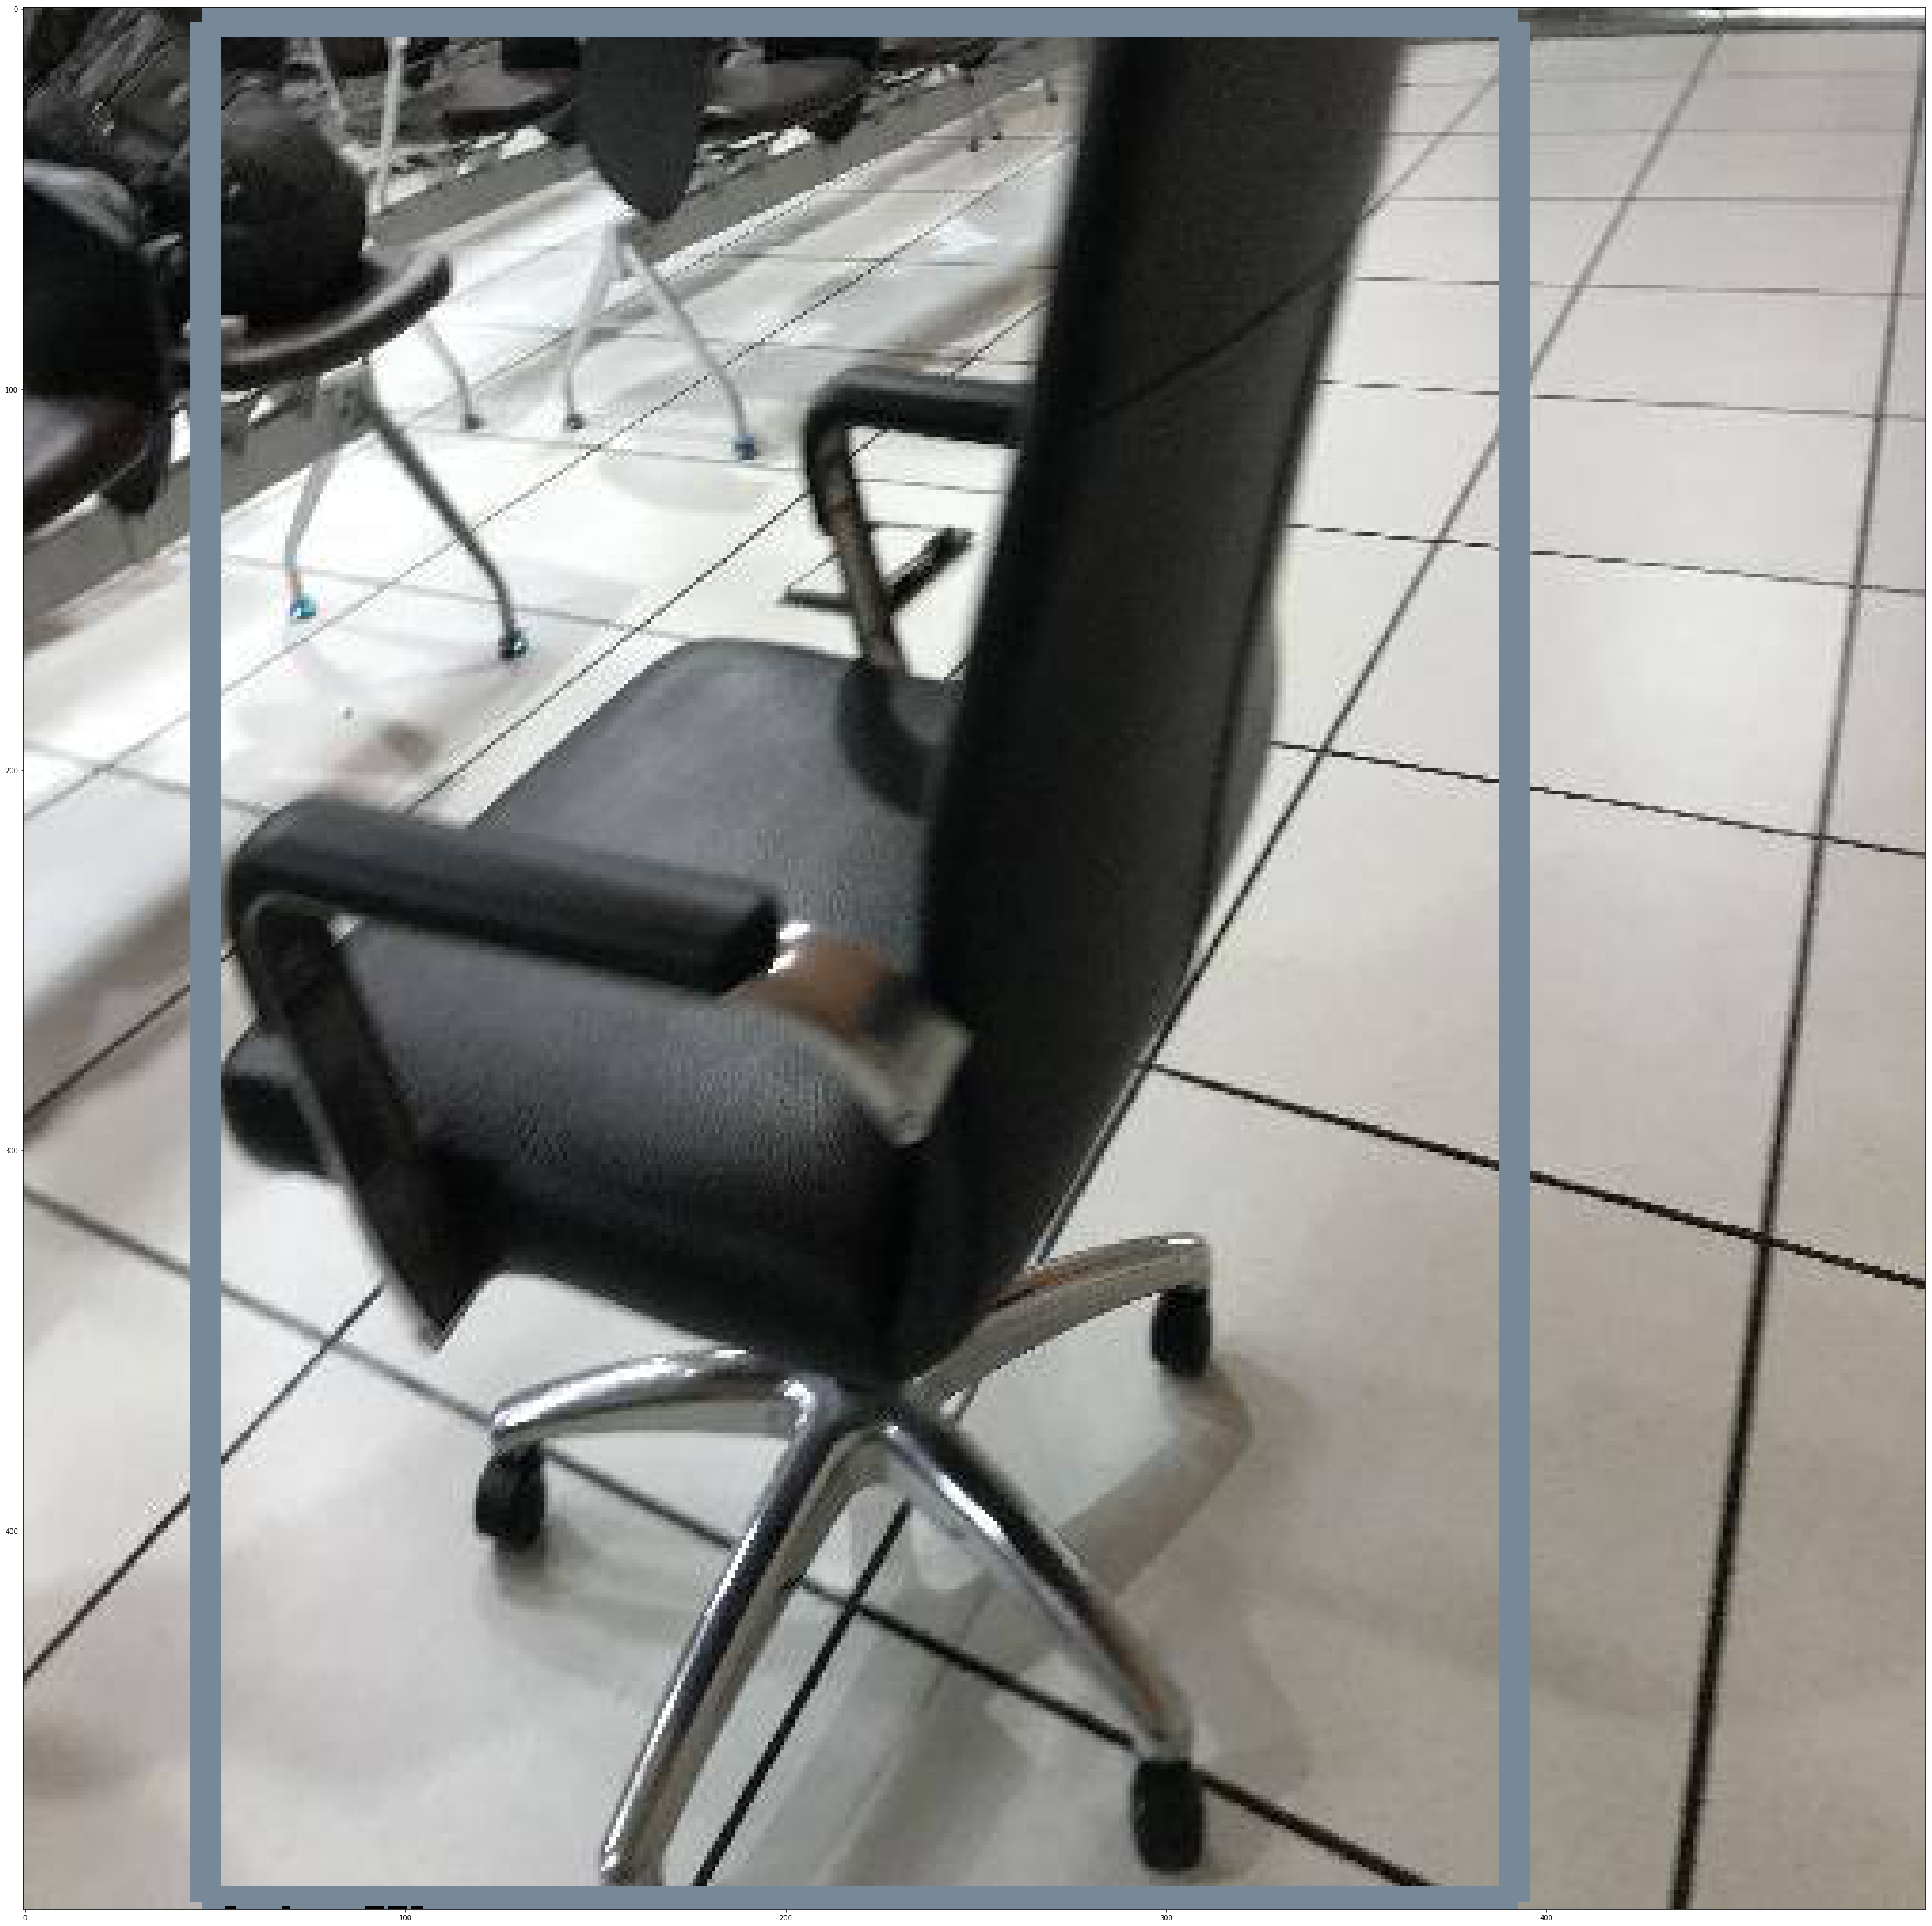

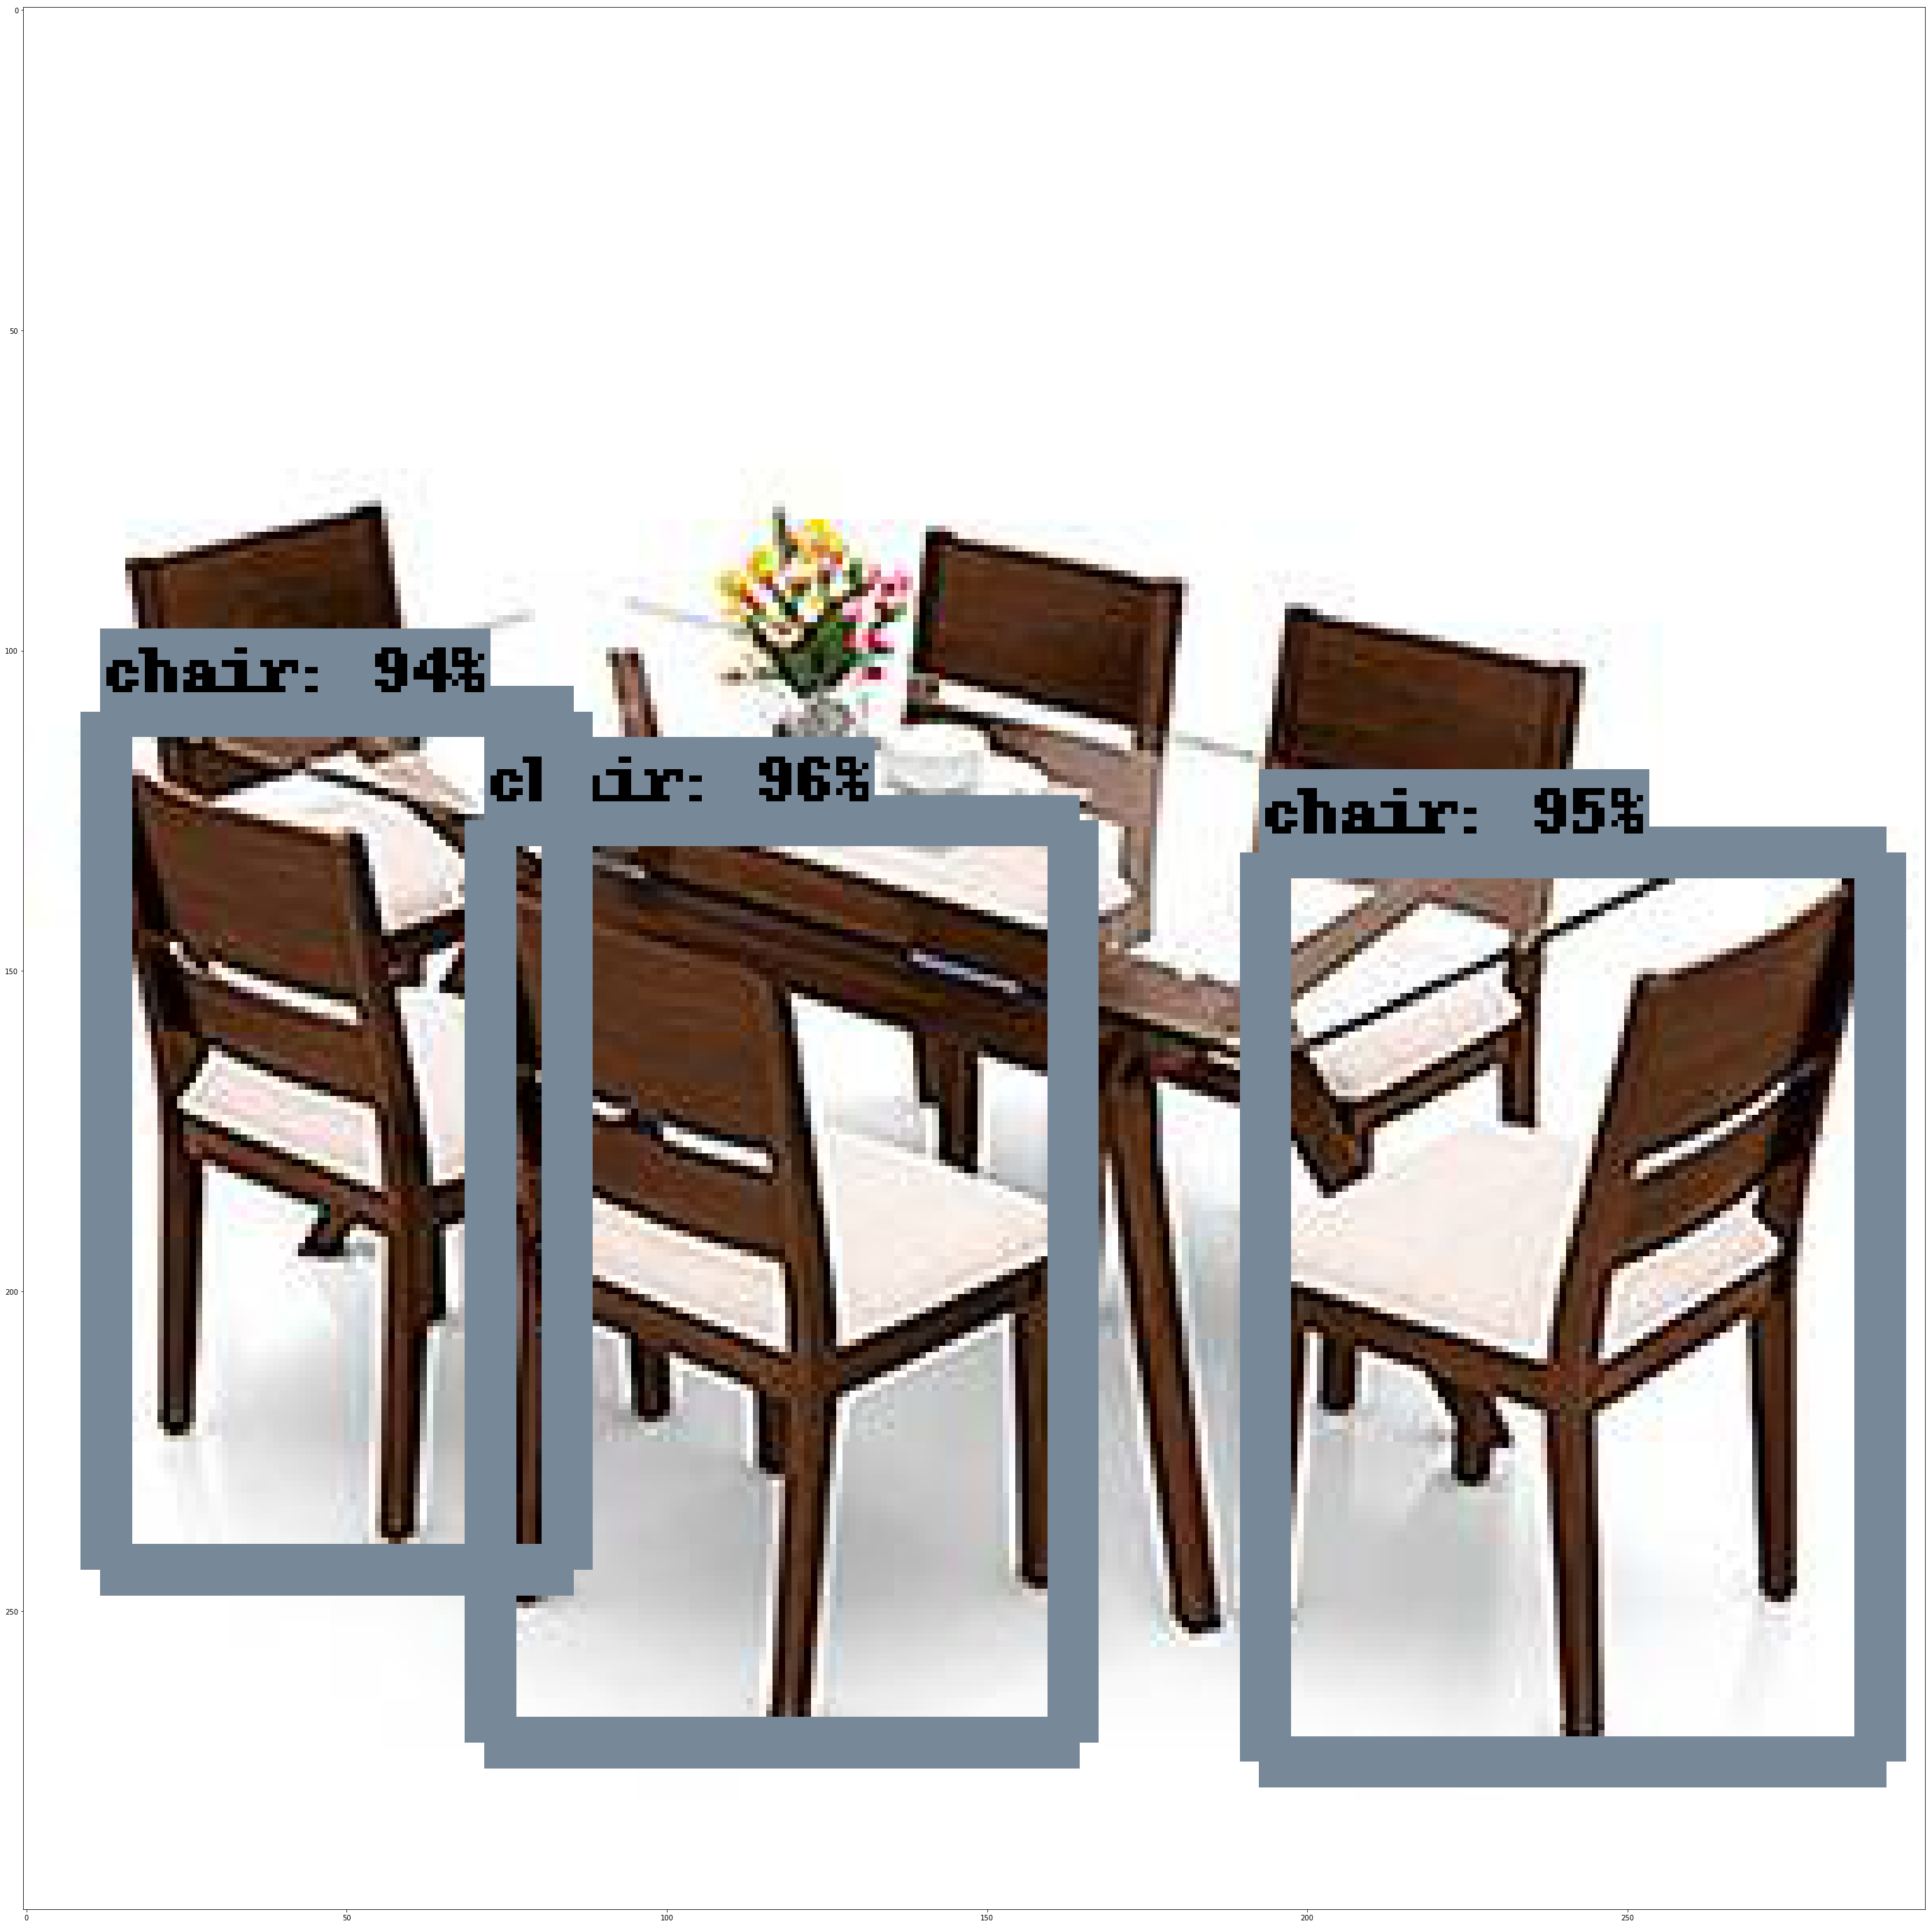

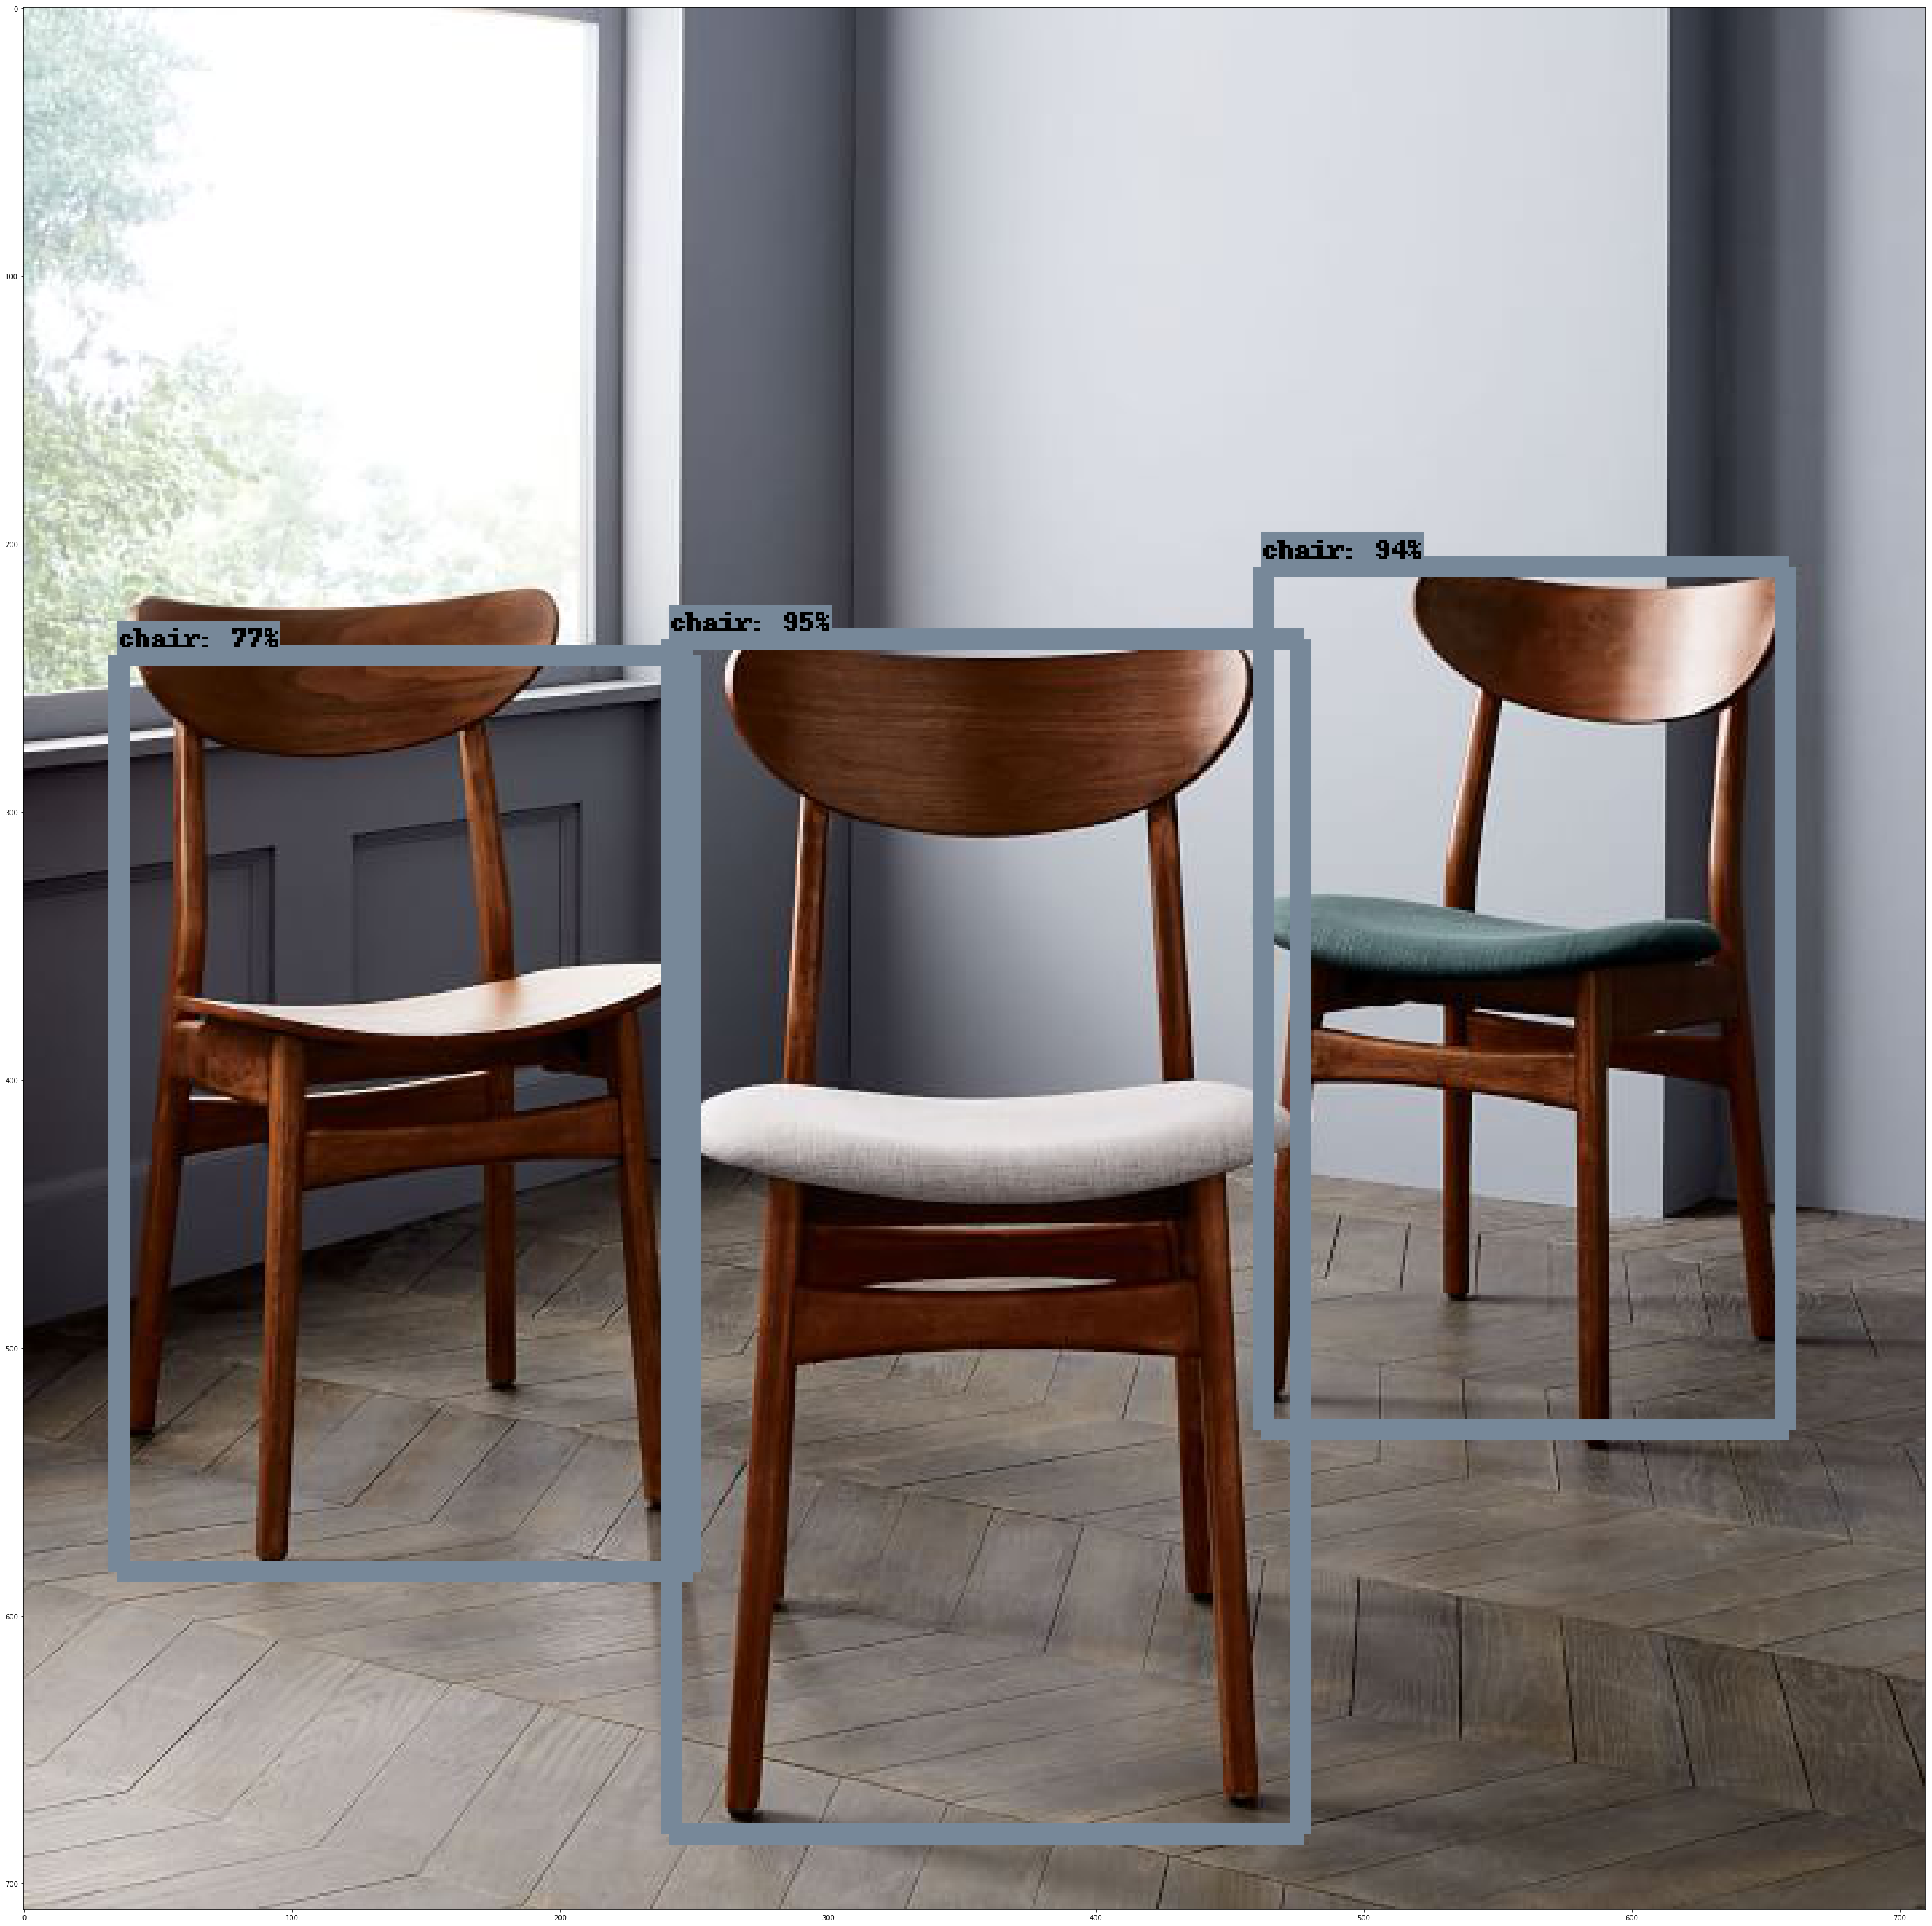

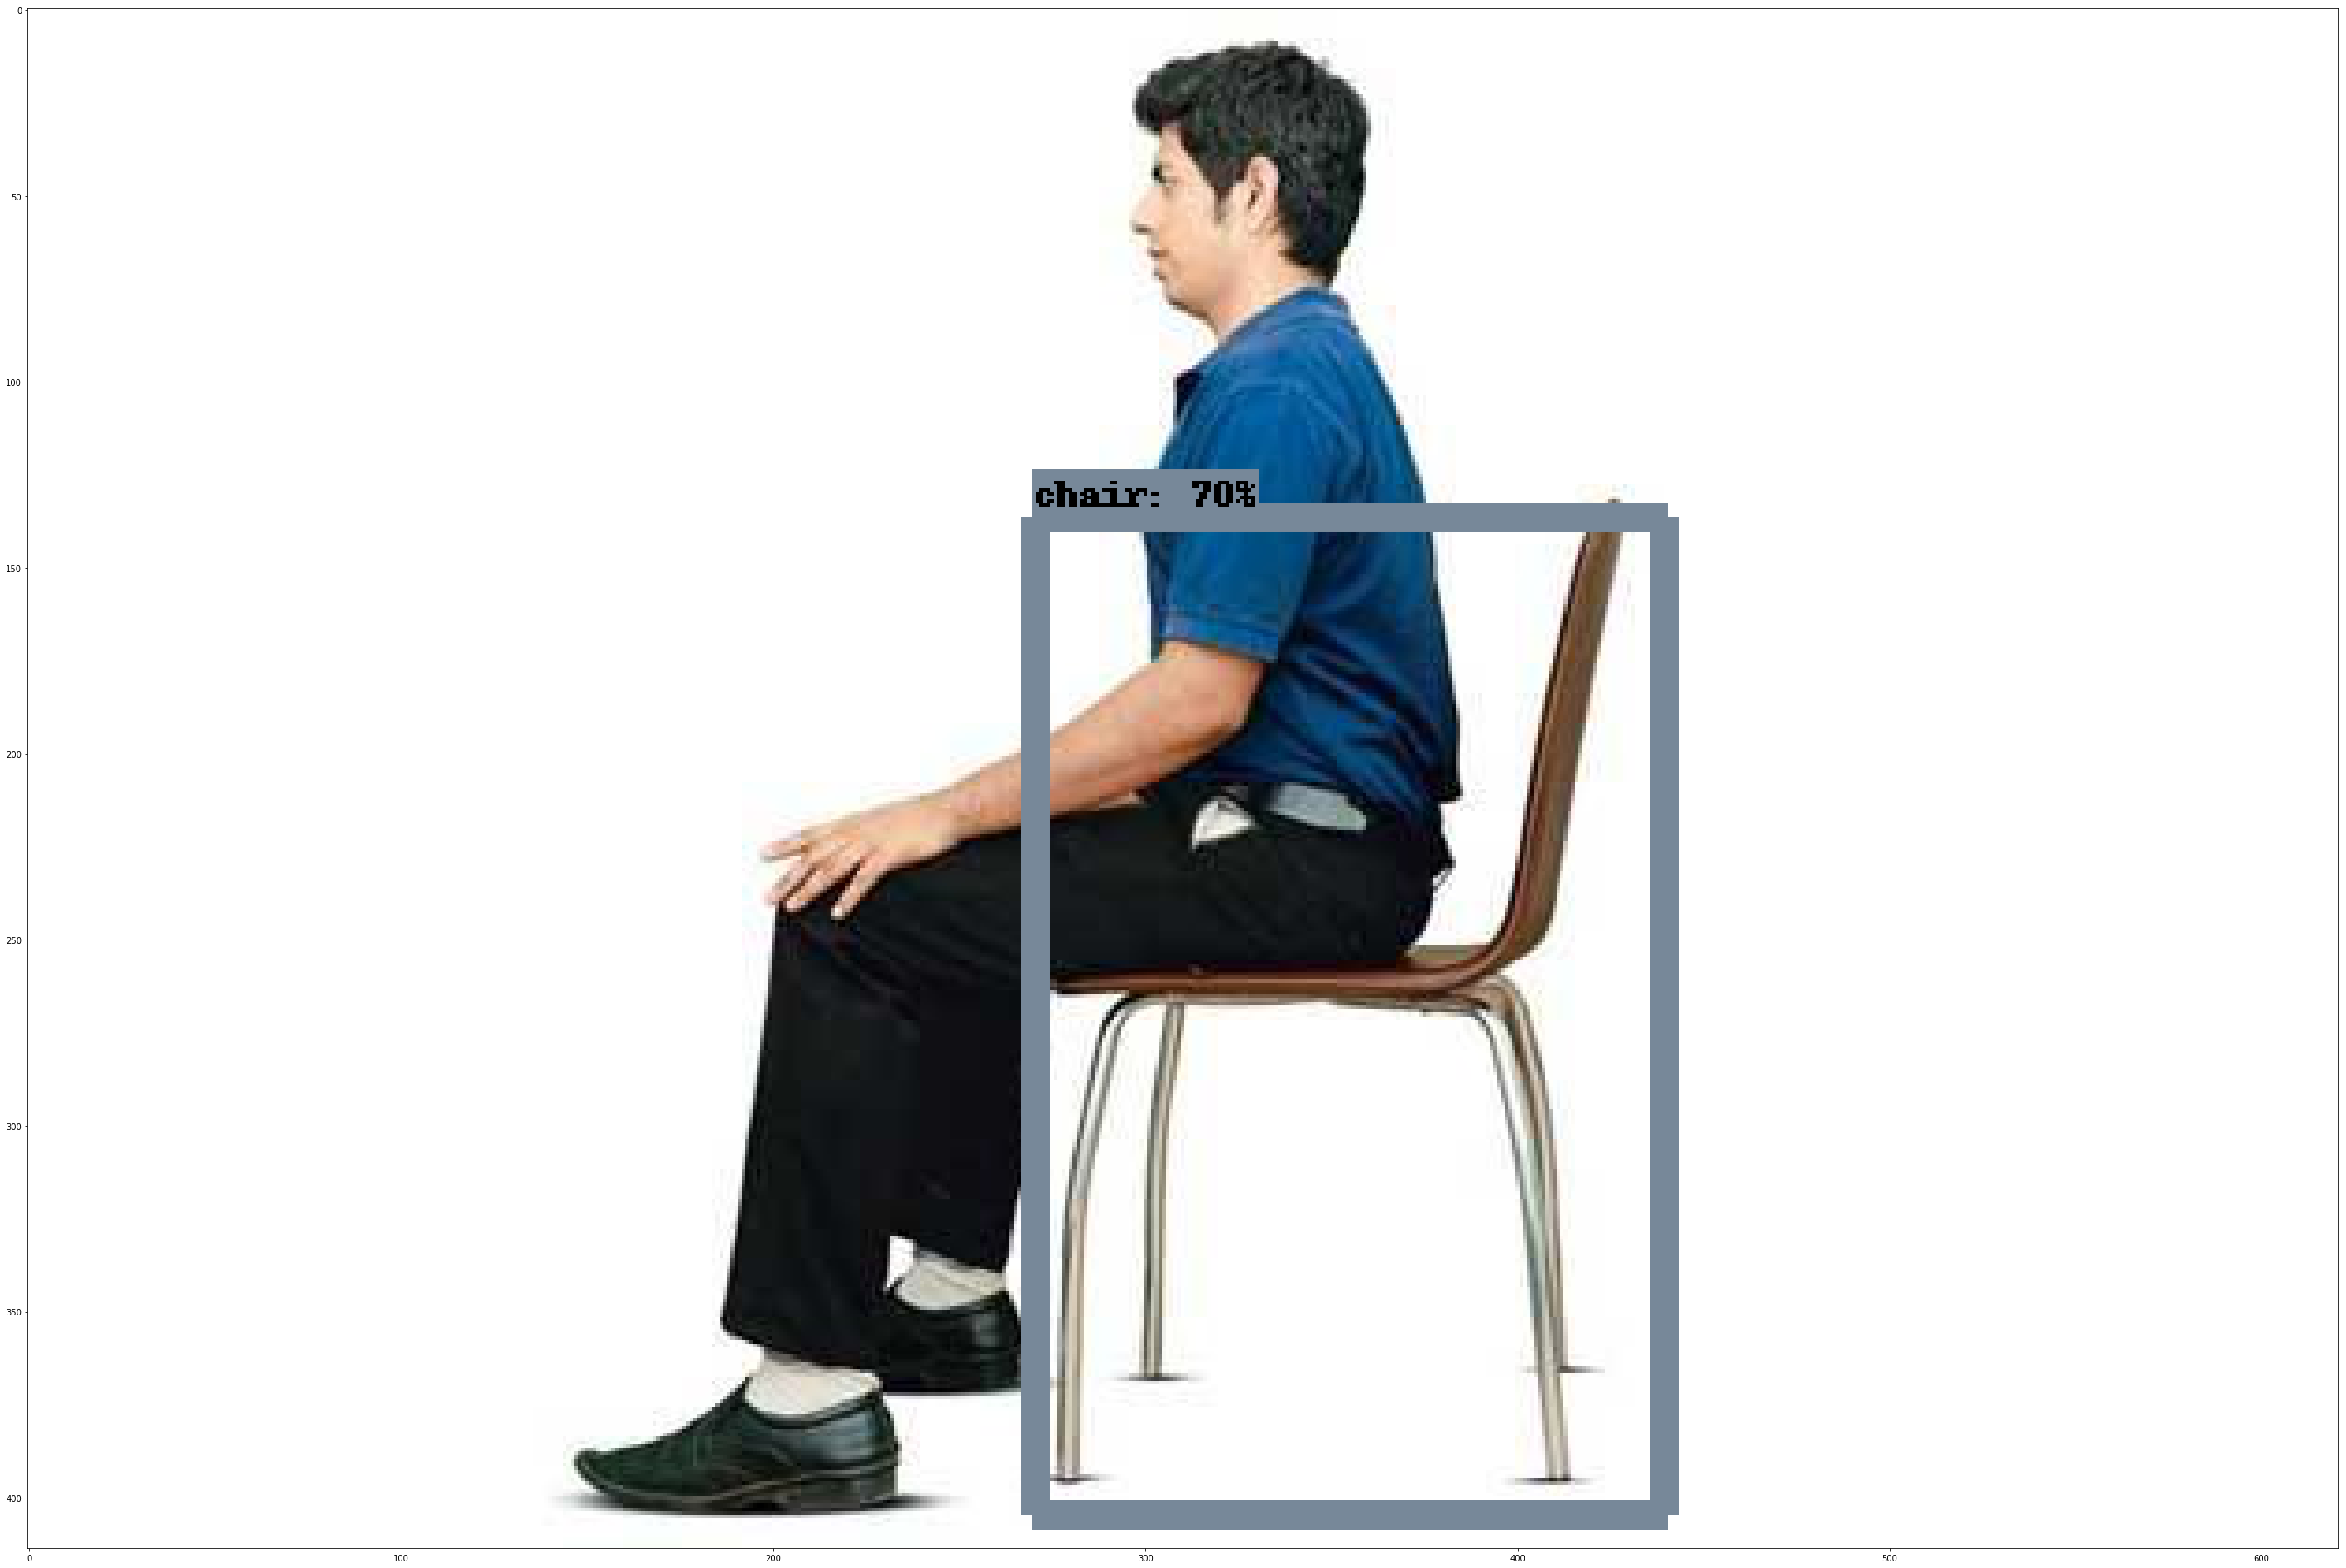

In [9]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
    
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      w, h = image.size
    
      (new_boxes, new_classes, new_scores) = viz_labels.filter_labels(boxes, scores, classes)
      data_deteced = viz_labels.convert_labels(np.array(new_boxes), np.array(new_classes), np.array(new_scores), w, h)
      data_focused = viz_labels.calculate_focus(data_deteced)
#       distance = distance()
      print data_deteced
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.array(new_boxes),
          np.array(new_classes),
          np.array(new_scores),
          category_index,
          use_normalized_coordinates=True,
          min_score_thresh=.6,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)